In [6]:
from google.colab import drive
drive.mount("/content/gdrive/")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as st

filepath = "/content/gdrive/My Drive/DATA/Automobiles-Processed.csv"
data = pd.read_csv(filepath)
data.head(20)
data.columns
data.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = 1, inplace = True)
data.columns
data.head(20)
data.to_csv("/content/gdrive/My Drive/DATA/Automobiles-Processed.csv")

datapath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df1 = pd.read_csv(datapath)
df1.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h1>Exploratory Data Analysis</h1>
<p>Exploratory Data Analysis or EDA is an approach to analyze data in order to summarize the main characteristics of the data, gain better understanding of the data set, uncover relationships between different variables, and extract important variables for the problem we are tring to solve

In [29]:
data.describe() #Distribution of the variables
data["Drive-Wheels"].value_counts()
data.columns
data["Drive-Wheels"].value_counts()

#to_frame() casts to dataframe
drive_wheels_count = data["Drive-Wheels"].value_counts().to_frame()
drive_wheels_count
drive_wheels_count.rename(columns = {"Drive-Wheels": "Value-Counts"}, inplace = True)
drive_wheels_count

sbn.boxplot(x = "Drive-Wheels", y = "Price", data = data)

#Scatterplot
xaxis = data["Engine-Size"]
yaxis = data["Price"]
plt.scatter(xaxis, yaxis)
plt.xlabel("Engine-Size")
plt.ylabel("Price")
plt.title("Correlation between Engine Size and Price")


,Value-Counts
fwd,118
rwd,75
4wd,8


<h1>Grouping Data</h1>

<p>The Python method dataframe.GroupBy() is applied to categorical variables. It groups data by the categories in that variable. We can group by a single variable or multiple variables. 

In [11]:
data.columns
dummy_df = data[["Drive-Wheels", "Body-Style", "Price"]]
dummy_df
df_grouping = dummy_df.groupby(["Drive-Wheels", "Body-Style"], as_index=False).mean()
df_grouping


,Drive-Wheels,Body-Style,Price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


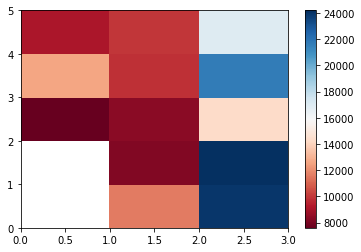

In [12]:
#Pivot table has one variable displayed along the column and another along the row.
#data_pivot = df_grouping.pivot(index = "Drive-Wheels", columns = "Body-Style")
data_pivot = df_grouping.pivot(index="Body-Style", columns="Drive-Wheels")
data_pivot

#Heatmap Plot
plt.pcolor(data_pivot, cmap = "RdBu") #Red-Blue color scheme
plt.colorbar()
plt.show()


<h1>Correlation</h1>
<p>Correlation is a statistical metric for measuring to what extent different variables are interdependent on each other. In other words, over time, if one variable changes, how does this affect the other variable?</p>

<p>Correlation = A measure of the extent of interdependence between variables</p>
<p>Causation = The relationship between cause and effect between two variables</p>

<p>Determining correlation is much simpler than determining causation as causation may require independent experimentation.</p>


(0.0, 47713.504214794186)

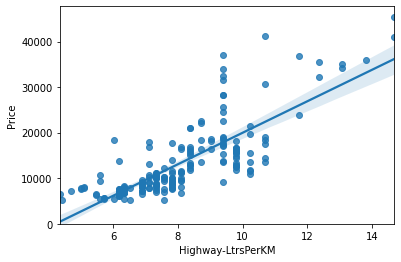

In [14]:
#Correlation between 'Engine-Size' and 'Price'
sbn.regplot(x = "Engine-Size", y = "Price", data = data)
plt.ylim(0,)
data.columns
#Correlation between "Highway-LtrsPerKM" and "Price"
sbn.regplot(x="Highway-LtrsPerKM", y = "Price", data = data)
plt.ylim(0,)

#Weak Correlation
#Correlation between "Peak-RPM" and "Price"
sbn.regplot(x = "Peak-RPM", y= "Price", data = data)
plt.ylim(0,)


<h1>Pearson Correlation</h1>
<p>Pearson Correlation measures the linear dependence between two variables X and Y. The resulting coefficient is a value between -1 and 1, where:</p>
<ul><li>1: Total positive linear correlation</li>
<li>0: No linear correlation. The two variables likely do not affect one another.</li>
<li>-1: Total negative linear correlation</li>
</ul>
<p>Pearson Correlation is the default method of the function corr()</p>


In [101]:
#Pearson Correlation
pearson_coef, p_value = st.pearsonr(data["Horsepower"], data["Price"])
print("Pearson Coefficient: ", pearson_coef)
print("P-Value: ", p_value)

data.corr()

Pearson Coefficient:  0.8096068016571054
P-Value:  6.273536270650504e-48


,Unnamed: 0,Symboling,Normalized-Losses,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Size,Bore,Stroke,Compression-Ratio,Horsepower,Peak-RPM,City-LtrsPerKM,Highway-LtrsPerKM,Price,Fuel-Type-Diesel,Fuel-Type-Gas,Standard,Turbo
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.162490,0.144301,-0.022505,-0.195662,-0.099157,-0.078346,-0.118214,0.121454,-0.121454,-0.082739,0.082739
Symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,0.066171,-0.029807,-0.082391,-0.196735,0.196735,0.054615,-0.054615
Normalized-Losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,0.238567,0.181189,0.133999,-0.101546,0.101546,0.006911,-0.006911
Wheel-Base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,0.476153,0.577576,0.584642,0.307237,-0.307237,-0.256889,0.256889
Length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,0.657373,0.707108,0.690628,0.211187,-0.211187,-0.230085,0.230085
Width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,0.673363,0.736728,0.751265,0.244356,-0.244356,-0.305732,0.305732
Height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,0.003811,0.084301,0.135486,0.281578,-0.281578,-0.090336,0.090336
Curb-Weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,0.785353,0.836921,0.834415,0.221046,-0.221046,-0.321955,0.321955
Engine-Size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,0.745059,0.783465,0.872335,0.070779,-0.070779,-0.110040,0.110040
Bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,0.554610,0.559112,0.543155,0.054458,-0.054458,-0.227816,0.227816


<h1>Analysis of Variance (ANOVA)</h1>
<p>Analysis of Variance (ANOVA) is a statistical test that can be used to find the correlation between different groups of a categorical variable. The ANOVA test returns two values, the F-Test and the P-Value. The F-Test score is the variation between sample group means divided the variation within sample group.</p>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


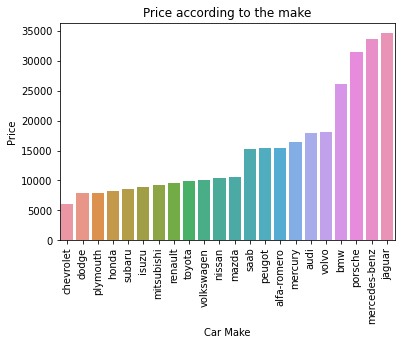

In [151]:
#Creating a bar chart
data.columns
dummy_df2 = data[["Make", "Price"]]
data.dtypes
grouped_df = dummy_df2.groupby(["Make"], as_index=False).mean()
grouped_df
sbn.barplot("Make", "Price", data = grouped_df, order = grouped_df.sort_values("Price").Make)
#plt.tight_layout()
plt.xticks(rotation = 90)
plt.xlabel("Car Make")
plt.ylabel("Price")
plt.title("Price according to the make")
plt.savefig("/content/gdrive/My Drive/DATA/PriceAccordingToCarMake.jpg", dpi = 800)

#ANOVA test
df_anova = data[["Make", "Price"]]
grouped_anova = df_anova.groupby(["Make"])
anova_results = st.f_oneway(grouped_anova.get_group("honda")["Price"], grouped_anova.get_group("jaguar")["Price"])
anova_results


<h1>Chi-Squared Tests</h1>


In [23]:
#Cross-Tabulation
cross_tab = pd.crosstab(data["Body-Style"], data["Drive-Wheels"])
st.chi2_contingency(cross_tab, correction=True)

#cross_tab1 = pd.crosstab(df1["fuel-type"], df1["aspiration"])
#st.chi2_contingency(crosstab1, correction=True)


(29.10870888999668,
 0.00030346520866119303,
 8,
 array([[ 0.23880597,  3.52238806,  2.23880597],
        [ 0.31840796,  4.69651741,  2.98507463],
        [ 2.70646766, 39.92039801, 25.37313433],
        [ 3.74129353, 55.1840796 , 35.07462687],
        [ 0.99502488, 14.67661692,  9.32835821]]))

<h1>Lab</h1>

(0.0, 47414.1)

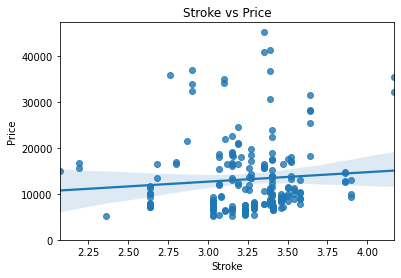

In [ ]:
print(data.dtypes["Peak-RPM"])
data.corr()
dummy_df3 = data[["Bore", "Stroke", "Compression-Ratio", "Horsepower"]]
dummy_df3.corr()

sbn.regplot(x = "Engine-Size", y = "Price", data = data)
plt.xlabel("Engine-Size")
plt.ylabel("Price")
plt.title("Engine Size vs Price")
plt.ylim(0,)

#Correlation between "Engine-Size" and "Price"
data[["Engine-Size", "Price"]].corr()

sbn.regplot(x = "Highway-LtrsPerKM", y = "Price", data = data)
plt.xlabel("Highway-MPG")
plt.ylabel("Price")
plt.title("Highway-LtrsPerKM vs Price")
plt.ylim(0,)

data.columns

#Correlation between "Highway-LtrsPerKM" and "Price"
data[["Highway-LtrsPerKM", "Price"]].corr()

#Weak Linear Relationship
sbn.regplot(x = "Peak-RPM", y = "Price", data = data)
plt.xlabel("Peak-RPM")
plt.ylabel("Price")
plt.title("Peak-RPM vs Price")
plt.ylim(0,)

#Correlation between "Peak-RPM" and "Price"
data[["Peak-RPM", "Price"]].corr()

#Correlation between "Stroke" and "Price"
data[["Stroke", "Price"]].corr()

sbn.regplot(x = "Stroke", y = "Price", data = data)
plt.xlabel("Stroke")
plt.ylabel("Price")
plt.title("Stroke vs Price")
plt.ylim(0,)


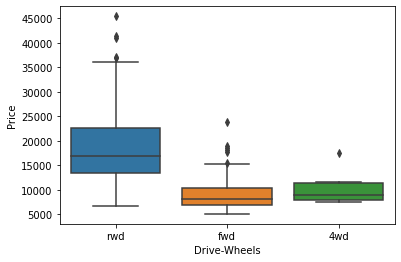

In [ ]:
#Categorical Variables
#Boxplots are a good way to visualize categorical variables

sbn.boxplot(x = "Body-Style", y = "Price", data = data)
sbn.boxplot(x = "Engine-Location", y = "Price", data = data)
sbn.boxplot(x = "Drive-Wheels", y = "Price", data = data)



In [148]:
#Descriptive Statistical Analysis

data.describe()
data.describe(include=["object"])

df1["drive-wheels"].value_counts()
drive_wheels_df = df1["drive-wheels"].value_counts().to_frame()
drive_wheels_df
drive_wheels_df.rename(columns = {"drive-wheels":"Value Counts"}, inplace = True)
drive_wheels_df

drive_wheels_count.index.name = "Drive-Wheels"
drive_wheels_count

drive_wheels_df.index.name = "Drive-Wheels"
drive_wheels_df

#"Engine-Location"
#The error here was the double brackets
data["Engine-Location"].value_counts()
engine_loc_df = data["Engine-Location"].value_counts().to_frame()
engine_loc_df
engine_loc_df.rename(columns = {"Engine-Location":"Value-Counts"}, inplace = True)
engine_loc_df
engine_loc_df.index.name = "Engine-Location"
engine_loc_df

data.columns
data.head(20)
data.describe()


,Unnamed: 0,Symboling,Normalized-Losses,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Size,Bore,Stroke,Compression-Ratio,Horsepower,Peak-RPM,City-LtrsPerKM,Highway-LtrsPerKM,Price,Fuel-Type-Diesel,Fuel-Type-Gas,Standard,Turbo
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,9.944145,8.044957,13207.129353,0.099502,0.900498,0.820896,0.179104
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,2.534599,1.840739,7947.066342,0.300083,0.300083,0.384397,0.384397
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,6.911765,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,9.791667,7.833333,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
#Grouping
data["Drive-Wheels"].unique()
test_df = data[["Drive-Wheels", "Body-Style", "Price"]]
test_df = test_df.groupby(["Drive-Wheels"], as_index=False).mean()
test_df

test_df2 = data[["Drive-Wheels", "Body-Style", "Price"]]
test_df2 = test_df2.groupby(["Drive-Wheels", "Body-Style"], as_index = False).mean()
test_df2

#Pivot Table
pivot_table1 = test_df2.pivot(index = "Drive-Wheels", columns = "Body-Style")
pivot_table1
pivot_table1 = pivot_table1.fillna(0) #Fill missing values with 0
pivot_table1

#Average price of each car based on body style
test_df3 = data[["Body-Style", "Price"]]
test_df3 = test_df3.groupby(["Body-Style"], as_index = False).mean()
test_df3


Price                ...                            
Body-Style   convertible       hardtop  ...         sedan         wagon
Drive-Wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

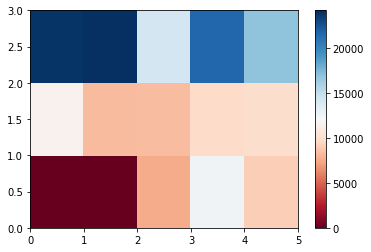

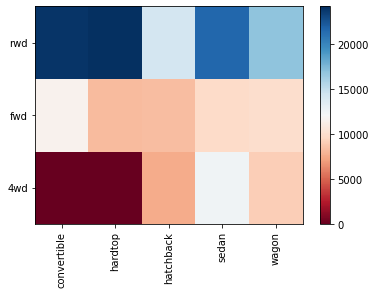

In [99]:
#Using heatmap to visualize the relationship between "Body-Style" and "Price"
plt.pcolor(pivot_table1, cmap = "RdBu")
plt.colorbar()
plt.show()

#???
#Styling the heatmap
fig, ax = plt.subplots()
im = ax.pcolor(pivot_table1, cmap = "RdBu")
#Label names
row_labels = pivot_table1.columns.levels[1] #"Body-Style"
column_labels = pivot_table1.index #"Drive-Wheels"
#Move ticks and labels to the center
ax.set_xticks(np.arange(pivot_table1.shape[1])+0.5, minor = False)
ax.set_yticks(np.arange(pivot_table1.shape[0])+0.5, minor = False)
#Insert labels
ax.set_xticklabels(row_labels, minor = False)
ax.set_yticklabels(column_labels, minor = False)
plt.xticks(rotation = 90)
fig.colorbar(im)
plt.show()

In [107]:
#Correlation and Causation
data.columns
data.describe()
data.describe(include = ['object'])

,Make,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Engine-Type,Num-of-Cylinders,Fuel-System,Price-Binned,Horsepower-Binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low,Low
freq,32,115,94,118,198,145,157,92,171,153


<h1>P-Value</h1>
<p>P-Value is the probability value that the correlation between two variables is statistically significant. Normally, a significance level of 0.05 is chosen, which means that there is a 95% confidence that the correlation between two variables is significant. By convention,</p>
<ul><li>P-Value < 0.001 - Strong evidence that the correlation is significant</li>
<li>P-Value < 0.05 - Moderate evidence that the correlation is significant</li>
<li>P-Value < 0.1 - Weak evidence that the correlation is significant</li>
<li>P-Value  > 0.1 - No evidence that the correlation is significant</li></ul>

In [138]:
#"Wheel-Base" vs "Price"
data["Wheel-Base"].head(20)
data["Wheel-Base"].dtypes
data["Price"].dtypes
pearson_coef, p_value = st.pearsonr(data["Wheel-Base"], data["Price"])
print("The Pearson Correlation coefficient is: ", pearson_coef, "with a P-Value of: ", p_value) #Statistically significant but linear relationship is weak

#"Horsepower" vs "Price"
data["Horsepower"].head(20)
pearson_coef, p_value = st.pearsonr(data["Horsepower"], data["Price"])
print("The Pearson Correlation coefficient is: ", pearson_coef, "with a P-Value of: ", p_value) #Statistically significant and linear relationship is strong

#"Length" vs "Price"
data["Length"].head(20)
pearson_coef, p_value = st.pearsonr(data["Length"], data["Price"])
print("The Pearson Correlation coefficient is: ", pearson_coef, "with a P-Value of: ", p_value) #Moderately significant but linear relationship is moderate

#"Width" vs "Price"
data["Width"].head(20)
pearson_coef, p_value = st.pearsonr(data["Width"], data["Price"])
print("The Pearson Correlation coefficient is: ", pearson_coef, "with a P-Value of: ", p_value) #Statistically significant and linear relationship is strong

#"Curb-Weight" vs "Price"
data["Curb-Weight"].head(20)
data["Curb-Weight"].dtypes
pearson_coef, p_value = st.pearsonr(data["Curb-Weight"], data["Price"])
print("The Pearson Correlation coefficient is: ", pearson_coef, "with a P-Value of: ", p_value) #Statistically significant and linear relationship is strong

#"Engine-Size" vs "Price"
data["Engine-Size"].head(20)
data["Engine-Size"].dtypes
print("The data type of Engine-Size is: ", data["Engine-Size"].dtypes)
pearson_coef, p_value = st.pearsonr(data["Engine-Size"], data["Price"])
print("The Pearson Correlation coefficient is: ", pearson_coef, "with a P-Value of: ", p_value) #Statistically significant and linear relationship is ~very~ strong

#"Bore" vs "Price"
data["Bore"].head(20)
data["Bore"].dtypes
pearson_coef, p_value = st.pearsonr(data["Bore"], data["Price"])
print("The Pearson Correlation coefficient is: ", pearson_coef, "with a P-Value of: ", p_value) #Statistically significant but linear relationship is moderately strong

#"City-LtrsPerKM" vs "Price"
data["City-LtrsPerKM"].head(20)
data["City-LtrsPerKM"].dtypes
pearson_coef, p_value = st.pearsonr(data["City-LtrsPerKM"], data["Price"])
print("The Pearson Correlation coefficient is: ", pearson_coef, "with a P-Value of: ", p_value) #Statistically significant and linear relationship is strong

#"Highway-LtrsPerKM" vs "Price"
data["Highway-LtrsPerKM"].head(20)
data["Highway-LtrsPerKM"].dtypes
pearson_coef, p_value = st.pearsonr(data["Highway-LtrsPerKM"], data["Price"])
print("The Pearson Correlation coefficient is: ", pearson_coef, "with a P-Value of: ", p_value) #Statistically significant and linear relationship is strong


The Pearson Correlation coefficient is:  0.8011176263981974 with a P-Value of:  3.046784581041456e-46


<h1>ANOVA</h1>
<p>The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters,
<ul><li><b>F-Test Score: </b>ANOVA assumes the means of all groups are same, calculates how much the actual means deviate from the assumption, and reports it as the F-Test score. A larger score means there is a large difference between the means.<li>
<li><b>P-Value: </b>P-Value tells how statistically significant our calculated score is.</li>
</ul>

In [156]:
#"Drive-Wheels" vs "Price"
testdf1 = data[["Drive-Wheels", "Price"]]
testdf1 = testdf1.groupby(["Drive-Wheels"])
testdf1.head(20)

testdf2 = data[["Drive-Wheels", "Body-Style", "Price"]]
testdf2

testdf1.get_group("4wd")["Price"]

f_value, p_value = st.f_oneway(testdf1.get_group("fwd")["Price"], testdf1.get_group("rwd")["Price"], testdf1.get_group("4wd")["Price"])
print("ANOVA results= ", f_value, "with a P-Value of: ", p_value)
#STRONG correlation and statistically significant

#Separately, fwd and rwd
f_value, p_value = st.f_oneway(testdf1.get_group("fwd")["Price"], testdf1.get_group("rwd")["Price"]) #STRONG correlation and statistically significant
print("ANOVA results: ", f_value, "with a P-Value of: ", p_value)

#Separately, fwd and 4wd
f_value, p_value = st.f_oneway(testdf1.get_group("fwd")["Price"], testdf1.get_group("4wd")["Price"]) #NO correlation and not statistically significant
print("ANOVA ressults: ", f_value, "with a P-Value of: ", p_value)

#Separately, rwd and 4wd
f_value, p_value = st.f_oneway(testdf1.get_group("rwd")["Price"], testdf1.get_group("4wd")["Price"]) #WEAK correlation and weakly statistically significant
print("ANOVA test results: ", f_value, "with a P-Value of: ", p_value)


ANOVA test results:  8.580681368924756 with a P-Value of:  0.004411492211225333
